In [1]:
import pandas as pd
import numpy as np

## Load the stock news data

In [2]:
news = pd.read_csv('analyst_ratings_processed.csv')
news.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [3]:
news.columns

Index(['Unnamed: 0', 'title', 'date', 'stock'], dtype='object')

In [4]:
news = news[['title', 'date', 'stock']]
news.head()

,title,date,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [5]:
# Lets have a look on the sunique stocks we have

news['stock'].unique()

array(['A', 'AAMC', 'AAME', ..., 'ZU', 'ZUMZ', 'ZX'], dtype=object)

In [6]:
# Now let's see how many instances we have for each stock

max_count = news.groupby('stock').count().iloc[:, 0].max()
stock_name = news.groupby('stock').count().iloc[:, 0][news.groupby('stock').count().iloc[:, 0] == max_count].index[0]
stock_name


'MRK'

In [7]:
# lets extract the news for this stock
new_news = news[news['stock'] == stock_name].reset_index(drop = True)

new_news.head()

,title,date,stock
0,Shares of several healthcare companies are tra...,2020-06-11 10:22:00-04:00,MRK
1,Johnson & Johnson To Start Coronavirus Vaccine...,2020-06-11 00:16:00-04:00,MRK
2,The Daily Biotech Pulse: Keytruda Setback For ...,2020-06-10 07:30:00-04:00,MRK
3,Merck Announces That The Phase 3 KEYNOTE-361 T...,2020-06-09 16:13:00-04:00,MRK
4,"The Week Ahead In Biotech: Viela FDA Decision,...",2020-06-07 13:43:00-04:00,MRK


In [8]:
new_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3334 entries, 0 to 3333
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3334 non-null   object
 1   date    3334 non-null   object
 2   stock   3334 non-null   object
dtypes: object(3)
memory usage: 78.3+ KB


In [9]:
new_news['date'] = pd.to_datetime(new_news['date'])
new_news['date'] = [item.date() for item in new_news['date']]
new_news.head()

,title,date,stock
0,Shares of several healthcare companies are tra...,2020-06-11,MRK
1,Johnson & Johnson To Start Coronavirus Vaccine...,2020-06-11,MRK
2,The Daily Biotech Pulse: Keytruda Setback For ...,2020-06-10,MRK
3,Merck Announces That The Phase 3 KEYNOTE-361 T...,2020-06-09,MRK
4,"The Week Ahead In Biotech: Viela FDA Decision,...",2020-06-07,MRK


In [10]:
new_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3334 entries, 0 to 3333
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3334 non-null   object
 1   date    3334 non-null   object
 2   stock   3334 non-null   object
dtypes: object(3)
memory usage: 78.3+ KB


### Now since we have filtered the news for the stock name MRK, this is time to get the stock prices for his particular stock.

In [11]:
# First of all check the timestamp

start_date = new_news['date'].iloc[0]
end_date = new_news['date'].iloc[-1]

start_date, end_date

(datetime.date(2020, 6, 11), datetime.date(2009, 7, 27))

In [12]:
! pip install yfinance

In [13]:
# Import Yahoo finance library

import yfinance as yf

# Get the data for the stock MRK
data = yf.download('MRK','2009-07-27','2020-06-11')

[*********************100%***********************]  1 of 1 completed


In [14]:
# Print 1st five rows of the data

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-07-27,29.694656,29.751907,29.026718,29.360687,18.955826,21026758
2009-07-28,29.303434,29.494274,28.406488,28.645039,18.493778,23627265
2009-07-29,28.635496,28.759542,28.158398,28.501907,18.401373,16696736
2009-07-30,28.826336,29.551527,28.511450,28.568703,18.444494,24300290
2009-07-31,28.816793,29.179390,28.540075,28.635496,18.487617,16269362


In [15]:
# Look at the information of columns of the data using .info method

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2738 entries, 2009-07-27 to 2020-06-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2738 non-null   float64
 1   High       2738 non-null   float64
 2   Low        2738 non-null   float64
 3   Close      2738 non-null   float64
 4   Adj Close  2738 non-null   float64
 5   Volume     2738 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 149.7 KB


### By now we have two different data frames named as new_news and data, the news dataframe contains news related to the stock and data dataframe contains the information about the stock values yeah. Before we merge both the data frames in a single data frame we will need to aggregate the news with respect to date.
Before we merge both the data frames in a single data frame we will need to aggregate the news with respect to date.
To aggregate the news with respect to date we will concatenate the rows which have the same date.

In [16]:
# Function used to concatenate the news data while using group by function

def concat_data(x):
    return ' '.join(x)

In [17]:
# Create the aggregate news for different date values

news_agg = new_news.groupby('date', axis = 0)['title'].apply(concat_data).sort_index()

In [18]:
# Add a new column named as news in the data and assigned the concatenated news to this column

data['news'] = news_agg

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,news
Date,,,,,,,
2009-07-27,29.694656,29.751907,29.026718,29.360687,18.955826,21026758,Wall Street News Alert: Stocks This Morning: ...
2009-07-28,29.303434,29.494274,28.406488,28.645039,18.493778,23627265,NaN
2009-07-29,28.635496,28.759542,28.158398,28.501907,18.401373,16696736,NaN
2009-07-30,28.826336,29.551527,28.511450,28.568703,18.444494,24300290,NaN
2009-07-31,28.816793,29.179390,28.540075,28.635496,18.487617,16269362,NaN


In [20]:
data.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
news         1289
dtype: int64

### It is clearly visible that there are some of the columns which are missing in the news values that means there are no news present for those particular days. Now to get rid of this issue we will consider the news for the day (which has no news to it) as the news of the previous day.

In [21]:
data.ffill(inplace = True)

data.head()

,Open,High,Low,Close,Adj Close,Volume,news
Date,,,,,,,
2009-07-27,29.694656,29.751907,29.026718,29.360687,18.955826,21026758,Wall Street News Alert: Stocks This Morning: ...
2009-07-28,29.303434,29.494274,28.406488,28.645039,18.493778,23627265,Wall Street News Alert: Stocks This Morning: ...
2009-07-29,28.635496,28.759542,28.158398,28.501907,18.401373,16696736,Wall Street News Alert: Stocks This Morning: ...
2009-07-30,28.826336,29.551527,28.511450,28.568703,18.444494,24300290,Wall Street News Alert: Stocks This Morning: ...
2009-07-31,28.816793,29.179390,28.540075,28.635496,18.487617,16269362,Wall Street News Alert: Stocks This Morning: ...


In [22]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
news         0
dtype: int64

In [23]:
# Create a new data set with only columns which we need

new_data = data[['Close', 'news']]

# Now since we have everything we need in a separate data frame it is time to free up some space by deleting the old dataframes

del data
del news
del new_news
del news_agg

In [24]:
new_data.head()

,Close,news
Date,,
2009-07-27,29.360687,Wall Street News Alert: Stocks This Morning: ...
2009-07-28,28.645039,Wall Street News Alert: Stocks This Morning: ...
2009-07-29,28.501907,Wall Street News Alert: Stocks This Morning: ...
2009-07-30,28.568703,Wall Street News Alert: Stocks This Morning: ...
2009-07-31,28.635496,Wall Street News Alert: Stocks This Morning: ...


## Now lets look at the stock price values in a graph

In [25]:
# Import the seaborn and matplotlib libraries

import seaborn as sns
import matplotlib.pyplot as plt

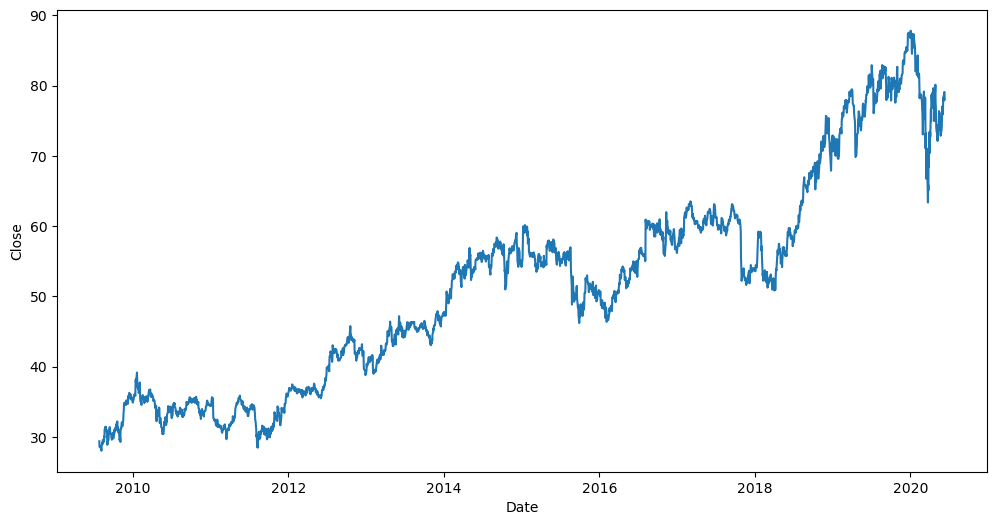

In [26]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = new_data.index, y = new_data['Close'])
plt.show()

### The next step in the process is to pre-process the text data

In [27]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn

In [28]:
# Time to preprocess our news
# While preprocessing we will remove all the unnecessary characters

def preprocess(df_news):
    df_news['news']=[entry.lower() for entry in df_news['news']]
    df_news.news =df_news.news.replace(to_replace='from:(.*\n)',value='',regex=True) #remove from to email 
    df_news.news =df_news.news.replace(to_replace='lines:(.*\n)',value='',regex=True)
    df_news.news =df_news.news.replace(to_replace='[!"#$%&\'()*+,/:;<=>?@[\\]^_`{|}~]',value=' ',regex=True) #remove punctuation except
    df_news.news =df_news.news.replace(to_replace='-',value=' ',regex=True)
    df_news.news =df_news.news.replace(to_replace='\s+',value=' ',regex=True)    #remove new line
    df_news.news =df_news.news.replace(to_replace='  ',value='',regex=True)                #remove double white space
    df_news.news =df_news.news.apply(lambda x:x.strip())  # Ltrim and Rtrim of whitespace

    for i,sen in enumerate(df_news.news):
        if len(sen.strip()) ==0:
            print(str(i))
            df_news=df_news.drop(str(i),axis=0).reset_index().drop('index',axis=1)

    return df_news

In [29]:
new_data = preprocess(new_data)

<ipython-input-28-0b2be024e649>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['news']=[entry.lower() for entry in df_news['news']]
/Users/ankushpandey/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
# Define a function to talk in his death sentences present in the news column since we cannot use sentences to train machine learning model.

def tokenise(df_news):
    df_news['news tokenize']= [word_tokenize(entry) for entry in df_news.news]
    return df_news

In [31]:
new_data = tokenise(new_data)
new_data.head()

<ipython-input-30-d00a3d83ea69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['news tokenize']= [word_tokenize(entry) for entry in df_news.news]


,Close,news,news tokenize
Date,,,
2009-07-27,29.360687,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn..."
2009-07-28,28.645039,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn..."
2009-07-29,28.501907,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn..."
2009-07-30,28.568703,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn..."
2009-07-31,28.635496,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn..."


In [32]:
# Our next step is to limit is the data
# The following function will take care of limitation all the related description is also mentioned in the function

def wordLemmatizer(data):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    file_clean_k =pd.DataFrame()
    for index,entry in enumerate(data):
        
        # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
        # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(entry):
            # Below condition is to check for Stop words and consider only alphabets
            if len(word)>1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
            # The final processed set of words for each iteration will be stored in 'text_final'
                file_clean_k.loc[index,'Final_keywords'] = str(Final_words)
                file_clean_k.loc[index,'Final_keywords'] = str(Final_words)
    return file_clean_k

In [36]:
new_data['Final_keywords'] = wordLemmatizer(new_data['news tokenize']).values
new_data.head()

<ipython-input-36-205ff01a4edd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Final_keywords'] = wordLemmatizer(new_data['news tokenize']).values


,Close,news,news tokenize,Final_keywords
Date,,,,
2009-07-27,29.360687,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","['wall', 'street', 'news', 'alert', 'stock', '..."
2009-07-28,28.645039,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","['wall', 'street', 'news', 'alert', 'stock', '..."
2009-07-29,28.501907,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","['wall', 'street', 'news', 'alert', 'stock', '..."
2009-07-30,28.568703,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","['wall', 'street', 'news', 'alert', 'stock', '..."
2009-07-31,28.635496,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","['wall', 'street', 'news', 'alert', 'stock', '..."


In [37]:
# Further cleaning of the data because I found some irregularities

def clean_more(df_clean):
    df_clean=df_clean.replace(to_replace ="\[.", value = '', regex = True)
    df_clean=df_clean.replace(to_replace ="'", value = '', regex = True)
    df_clean=df_clean.replace(to_replace =" ", value = '', regex = True)
    df_clean=df_clean.replace(to_replace ='\]', value = '', regex = True)

    return df_clean

In [38]:
new_data['Final_keywords'] = clean_more(new_data['Final_keywords']).values
new_data.head()

<ipython-input-38-2fbc944d490d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Final_keywords'] = clean_more(new_data['Final_keywords']).values


,Close,news,news tokenize,Final_keywords
Date,,,,
2009-07-27,29.360687,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","wall,street,news,alert,stock,morning,green,sta..."
2009-07-28,28.645039,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","wall,street,news,alert,stock,morning,green,sta..."
2009-07-29,28.501907,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","wall,street,news,alert,stock,morning,green,sta..."
2009-07-30,28.568703,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","wall,street,news,alert,stock,morning,green,sta..."
2009-07-31,28.635496,wall street news alert stocks this morning gre...,"[wall, street, news, alert, stocks, this, morn...","wall,street,news,alert,stock,morning,green,sta..."


In [44]:
# Now we will create the vocabulary
# We will also create the TFIDF vectors

from sklearn.feature_extraction.text import TfidfVectorizer
import operator


def create_vocabulary(df_news):
    ## Create Vocabulary
    vocabulary = set()

    for doc in df_news.Final_keywords:
        vocabulary.update(doc.split(','))

    vocabulary = list(vocabulary)
    return vocabulary




In [46]:
vocabulary = create_vocabulary(new_data)

In [54]:
def tfidf_vector(vocabulary, df_news):
    # Intializating the tfIdf model
    tfidf = TfidfVectorizer(vocabulary=vocabulary,dtype=np.float32)

    # Fit the TfIdf model
    tfidf.fit(df_news.Final_keywords)

    # Transform the TfIdf model
    news_vectors=tfidf.transform(df_news.Final_keywords)
    
    return news_vectors

In [57]:
news_vectors = tfidf_vector(vocabulary, new_data)

news_vectors.shape

(2738, 4359)

### By this time we are done with all sort of processing, now we will create a K means clustering model and cluster the news vectors

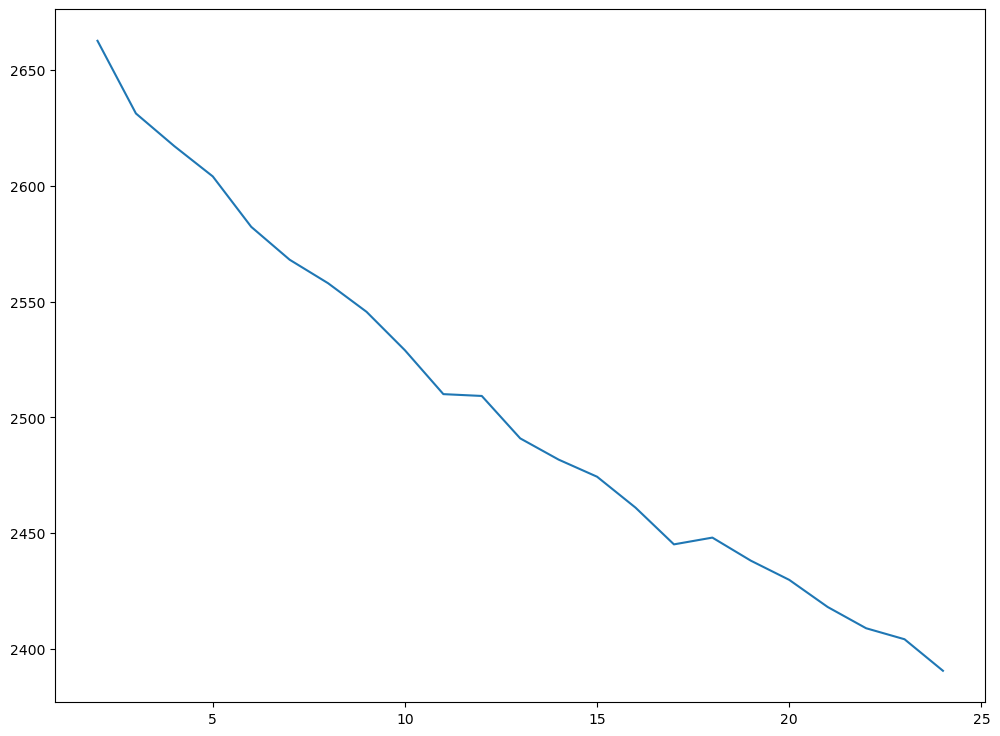

In [63]:
from sklearn.cluster import KMeans

# we also need to select the best value of n_clusters in the clusters
# Following loop will get us the best value of n_clusters

inertia_dict = {}

for k in range(2, 25):
    kmean = KMeans(n_clusters = k)
    kmean.fit(news_vectors)
    inertia_dict[k] = kmean.inertia_


plt.figure(figsize = (12, 9))
sns.lineplot(x = list(inertia_dict.keys()), y = list(inertia_dict.values()))
plt.show()